In [6]:
import pandas as pd
df = pd.read_csv('data.csv', encoding='latin-1')



df.head()


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


<ipython-input-7-3dc867136301>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette='crest')


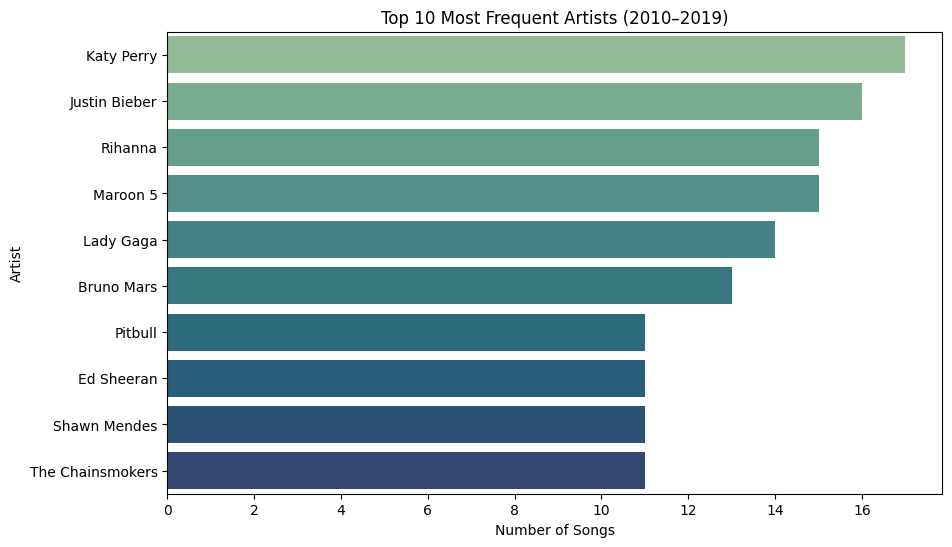

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists = df['artist'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='crest')
plt.title('Top 10 Most Frequent Artists (2010–2019)')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


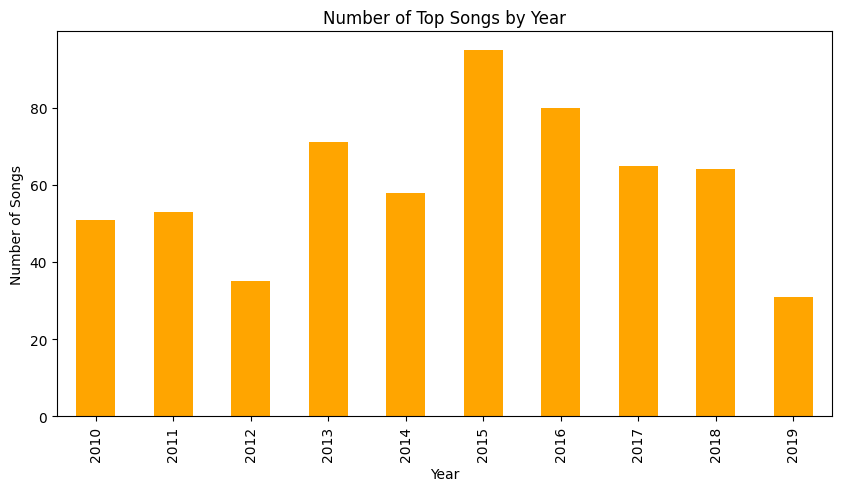

In [8]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Number of Top Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()


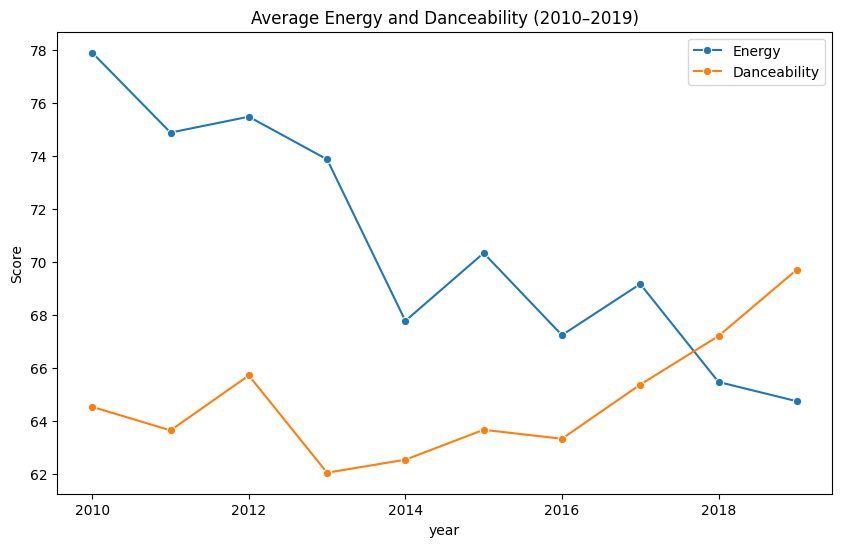

In [9]:
yearly_stats = df.groupby('year')[['nrgy', 'dnce']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_stats, x='year', y='nrgy', label='Energy', marker='o')
sns.lineplot(data=yearly_stats, x='year', y='dnce', label='Danceability', marker='o')
plt.title('Average Energy and Danceability (2010–2019)')
plt.ylabel('Score')
plt.show()


In [11]:
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

<ipython-input-12-13a9e3707a31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')


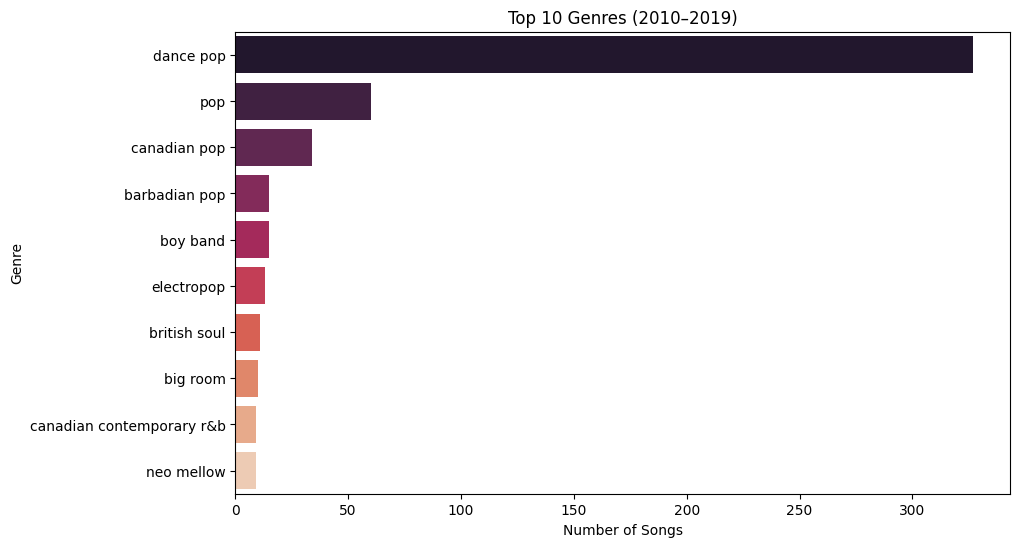

In [12]:
top_genres = df['top genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 10 Genres (2010–2019)')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()


In [13]:
df_ts_lr = df[df['artist'].isin(['Taylor Swift', 'Lana Del Rey'])]
df_ts_lr.head()


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
109,110,I Knew You Were Trouble.,Taylor Swift,pop,2012,77,47,62,-7,3,68,220,0,4,77
113,114,We Are Never Ever Getting Back Together,Taylor Swift,pop,2012,86,68,63,-6,12,75,193,1,9,75
152,153,We Are Never Ever Getting Back Together,Taylor Swift,pop,2013,86,68,63,-6,12,75,193,1,9,75
155,156,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,Lana Del Rey,art pop,2013,126,81,57,-6,13,11,215,2,6,74
215,216,Shake It Off,Taylor Swift,pop,2014,160,80,65,-5,33,94,219,6,17,78


<ipython-input-14-ea0689e9627c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=song_counts.index, y=song_counts.values, palette=['pink', 'purple'])


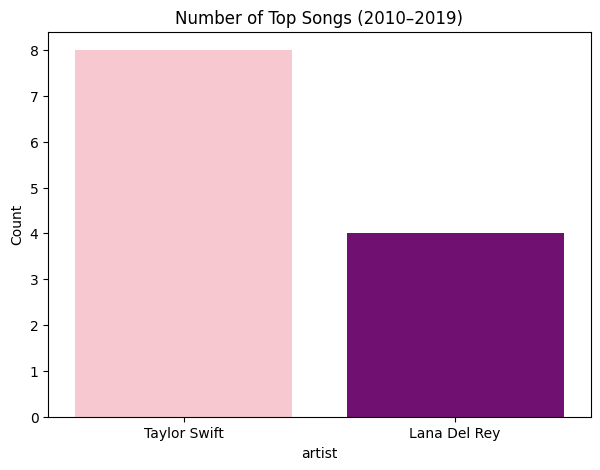

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

song_counts = df_ts_lr['artist'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=song_counts.index, y=song_counts.values, palette=['pink', 'purple'])
plt.title('Number of Top Songs (2010–2019)')
plt.ylabel('Count')
plt.show()


<ipython-input-15-40be0fb885e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='artist', y='pop', data=df_ts_lr, palette=['pink', 'purple'])


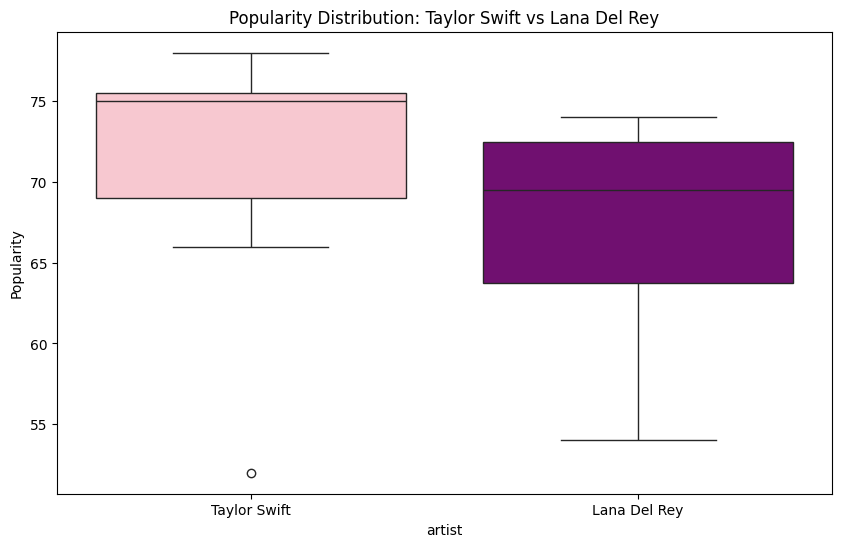

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='artist', y='pop', data=df_ts_lr, palette=['pink', 'purple'])
plt.title('Popularity Distribution: Taylor Swift vs Lana Del Rey')
plt.ylabel('Popularity')
plt.show()


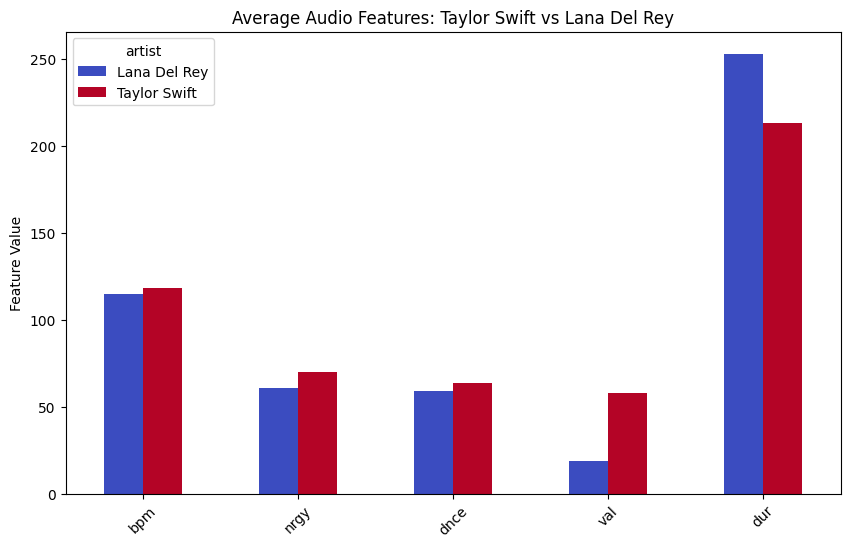

In [16]:
features = ['bpm', 'nrgy', 'dnce', 'val', 'dur']

artist_features = df_ts_lr.groupby('artist')[features].mean().reset_index()
artist_features.set_index('artist', inplace=True)

artist_features.T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Average Audio Features: Taylor Swift vs Lana Del Rey')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Sort each artist’s tracks by popularity, descending
top_ts_tracks = df[df['artist'] == 'Taylor Swift'].sort_values(by='pop', ascending=False).head(10)
top_lr_tracks = df[df['artist'] == 'Lana Del Rey'].sort_values(by='pop', ascending=False).head(10)
print("Top 10 Taylor Swift Tracks (2010-2019):")
print(top_ts_tracks[['title', 'pop', 'year']])

print("\nTop 10 Lana Del Rey Tracks (2010-2019):")
print(top_lr_tracks[['title', 'pop', 'year']])


Top 10 Taylor Swift Tracks (2010-2019):
                                       title  pop  year
215                             Shake It Off   78  2014
109                 I Knew You Were Trouble.   77  2012
113  We Are Never Ever Getting Back Together   75  2012
152  We Are Never Ever Getting Back Together   75  2013
537                 Look What You Made Me Do   75  2018
549                                 End Game   70  2018
407                         Out Of The Woods   66  2016
569       ...Ready For It? - BloodPop® Remix   52  2018

Top 10 Lana Del Rey Tracks (2010-2019):
                                                 title  pop  year
155  Summertime Sadness (Lana Del Rey Vs. Cedric Ge...   74  2013
471                                               Love   72  2017
486   Summer Bummer (feat. A$AP Rocky & Playboi Carti)   67  2017
499                    Lust for Life (with The Weeknd)   54  2017


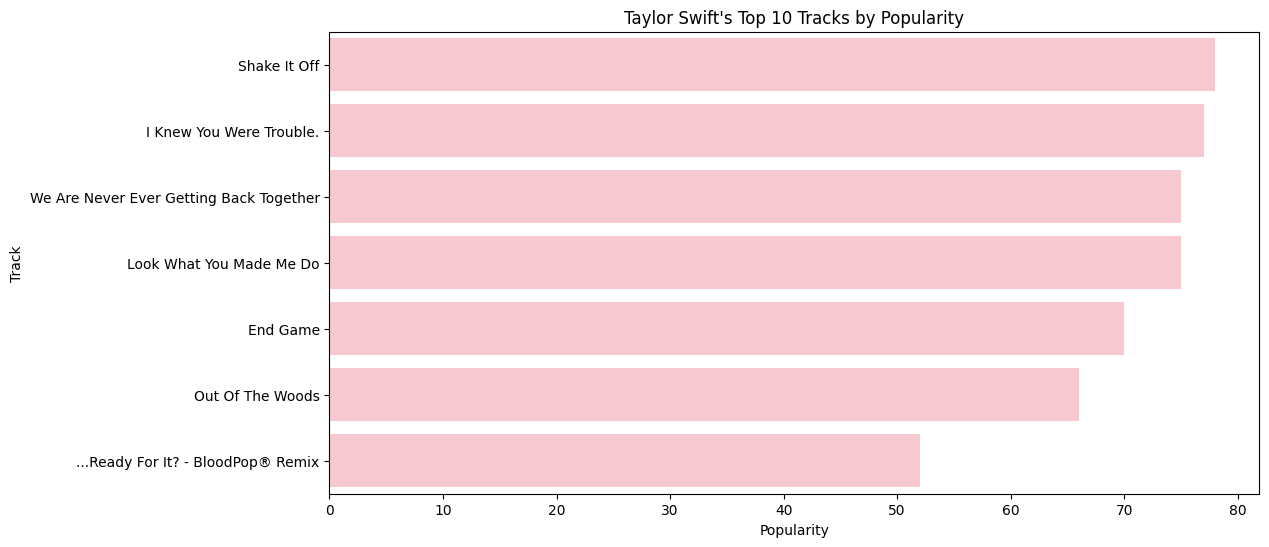

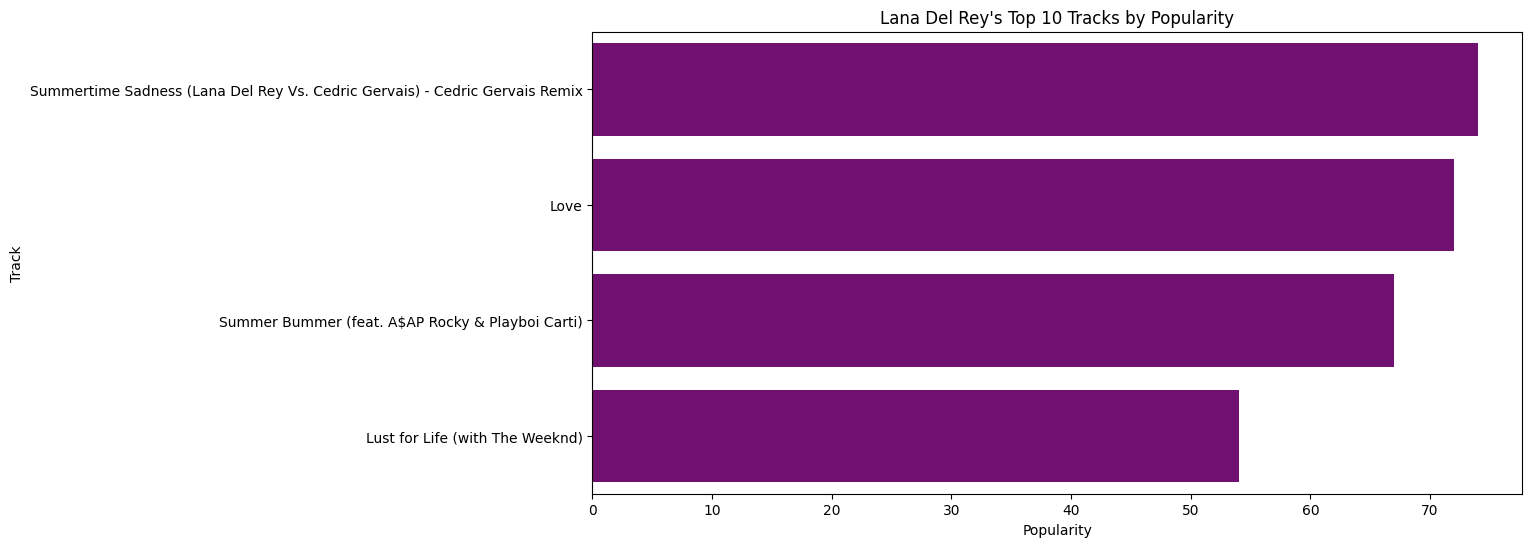

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='pop', y='title', data=top_ts_tracks, color='pink')
plt.title("Taylor Swift's Top 10 Tracks by Popularity")
plt.xlabel('Popularity')
plt.ylabel('Track')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='pop', y='title', data=top_lr_tracks, color='purple')
plt.title("Lana Del Rey's Top 10 Tracks by Popularity")
plt.xlabel('Popularity')
plt.ylabel('Track')
plt.show()


In [20]:
df_weeknd = df[df['artist'] == 'The Weeknd']
df_weeknd.head()


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
278,279,"Earned It (Fifty Shades Of Grey) - From The ""F...",The Weeknd,canadian contemporary r&b,2015,120,38,66,-6,10,44,252,39,3,79
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
445,446,Starboy,The Weeknd,canadian contemporary r&b,2017,186,59,68,-7,14,49,230,14,28,85
449,450,I Feel It Coming,The Weeknd,canadian contemporary r&b,2017,93,82,77,-6,7,59,269,43,12,81


In [22]:
print(f"The Weeknd has {df_weeknd.shape[0]} songs in the dataset (2010-2019).")
top_weeknd_tracks = df_weeknd.sort_values(by='pop', ascending=False).head(10)
print("The Weeknd's Top 10 Tracks (2010-2019):")
print(top_weeknd_tracks[['title', 'pop', 'year']])


The Weeknd has 5 songs in the dataset (2010-2019).
The Weeknd's Top 10 Tracks (2010-2019):
                                                 title  pop  year
445                                            Starboy   85  2017
270                                          The Hills   84  2015
363                                          The Hills   84  2016
449                                   I Feel It Coming   81  2017
278  Earned It (Fifty Shades Of Grey) - From The "F...   79  2015


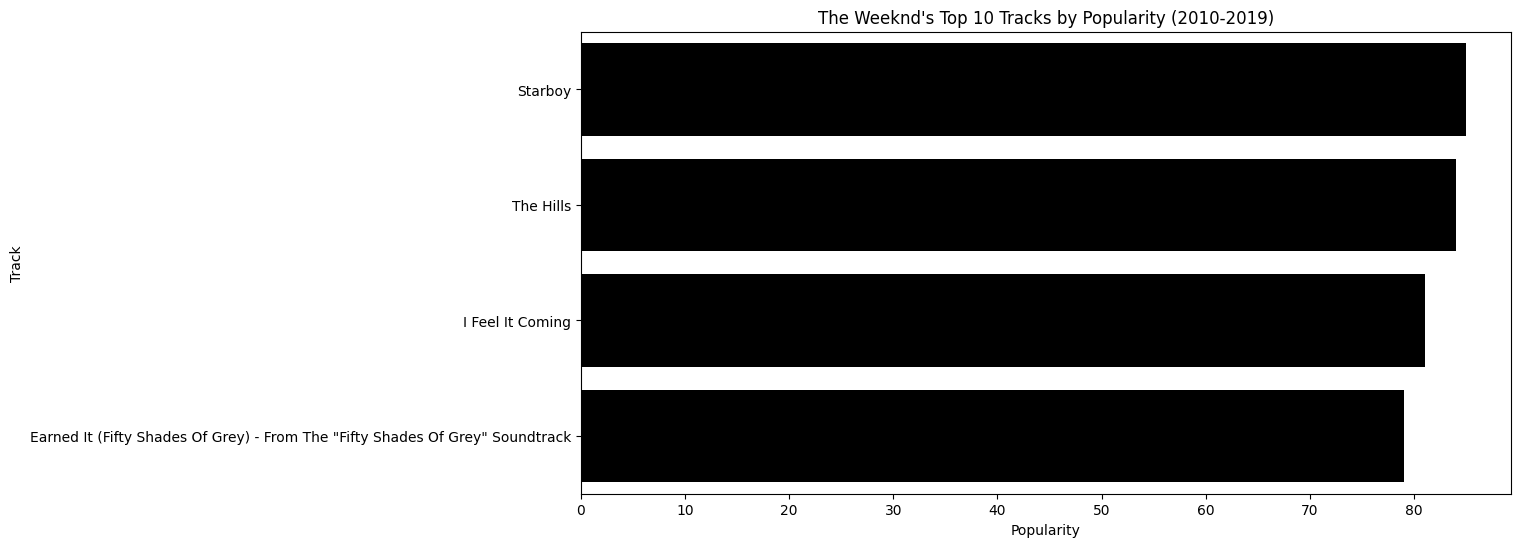

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='pop', y='title', data=top_weeknd_tracks, color='black')
plt.title("The Weeknd's Top 10 Tracks by Popularity (2010-2019)")
plt.xlabel('Popularity')
plt.ylabel('Track')
plt.show()


artist
Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Pitbull             11
Ed Sheeran          11
Shawn Mendes        11
The Chainsmokers    11
Jennifer Lopez      10
Adele               10
Calvin Harris       10
Britney Spears       9
OneRepublic          9
Name: count, dtype: int64


<ipython-input-24-4aa715a5740f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette='coolwarm')


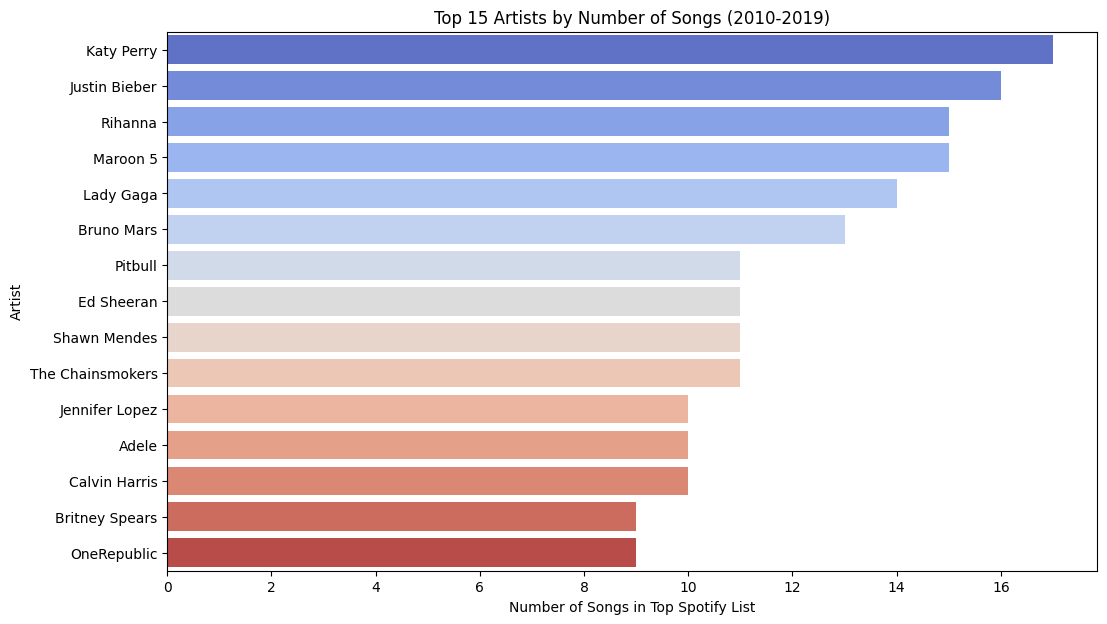

In [24]:
top_artists = df['artist'].value_counts().head(15)
print(top_artists)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='coolwarm')
plt.title('Top 15 Artists by Number of Songs (2010-2019)')
plt.xlabel('Number of Songs in Top Spotify List')
plt.ylabel('Artist')
plt.show()


<ipython-input-25-c2a89ade7299>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pop', y='title', data=top_tracks, palette='viridis')


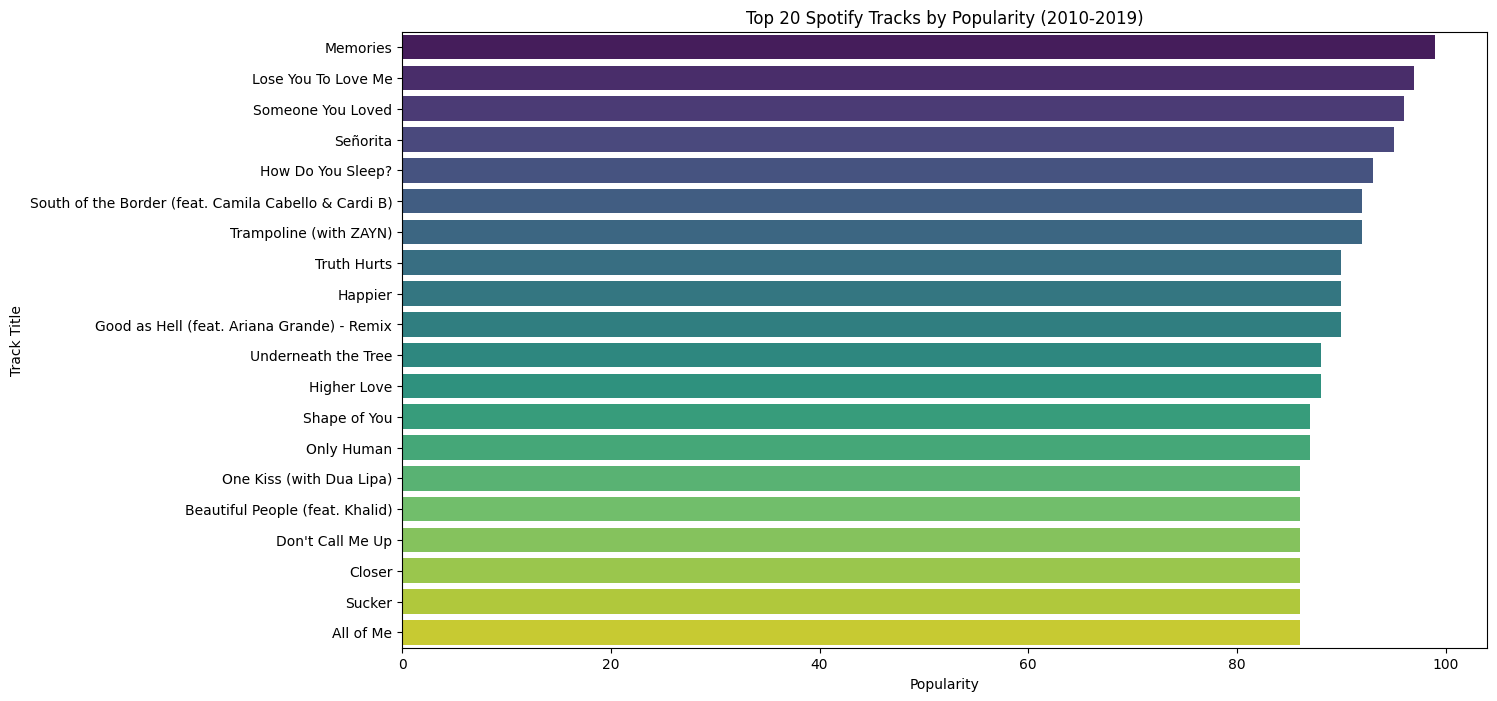

In [25]:
top_tracks = df.sort_values(by='pop', ascending=False).head(20)  # Top 20 tracks overall

top_tracks[['title', 'artist', 'pop', 'year']]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(x='pop', y='title', data=top_tracks, palette='viridis')
plt.title('Top 20 Spotify Tracks by Popularity (2010-2019)')
plt.xlabel('Popularity')
plt.ylabel('Track Title')
plt.show()



<ipython-input-26-49d9a485ac5f>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tracks_compare = top_tracks_compare.groupby('artist').apply(lambda x: x.nlargest(10, 'pop')).reset_index(drop=True)


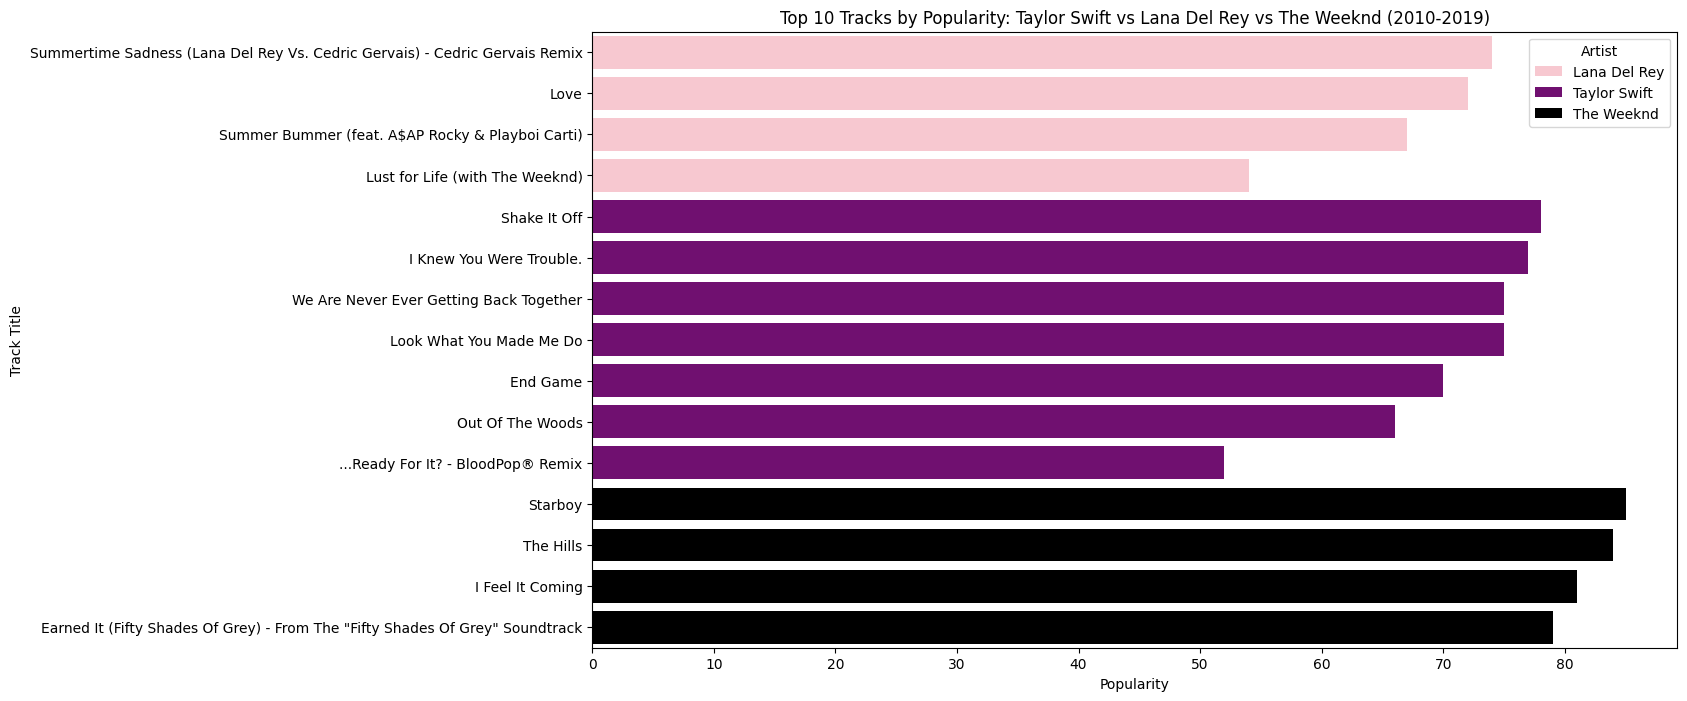

In [26]:
artists = ['Taylor Swift', 'Lana Del Rey', 'The Weeknd']
top_tracks_compare = df[df['artist'].isin(artists)].copy()

top_tracks_compare = top_tracks_compare.groupby('artist').apply(lambda x: x.nlargest(10, 'pop')).reset_index(drop=True)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(x='pop', y='title', hue='artist', data=top_tracks_compare, dodge=False, palette=['pink', 'purple', 'black'])
plt.title('Top 10 Tracks by Popularity: Taylor Swift vs Lana Del Rey vs The Weeknd (2010-2019)')
plt.xlabel('Popularity')
plt.ylabel('Track Title')
plt.legend(title='Artist')
plt.show()
